In [1]:
import numpy as np, math, networkx as nx
import matplotlib.pyplot as plt

from bokeh.io import show, output_file, output_notebook
from bokeh.plotting import figure
from bokeh.models import GraphRenderer, StaticLayoutProvider, Oval, Circle
from bokeh.palettes import Spectral8
from bokeh.models.graphs import from_networkx
output_notebook()

file = 'weighted_person-person_projection_anonymous_combined.graphml'
g = nx.read_graphml(f'../Graphs/{file}')
Gc = max(nx.connected_component_subgraphs(g), key=len)

Loading BokehJS ...

In [2]:
deg = nx.degree(Gc, weight = 'weight')

(7452,) (20442,)
(703,)
> 703


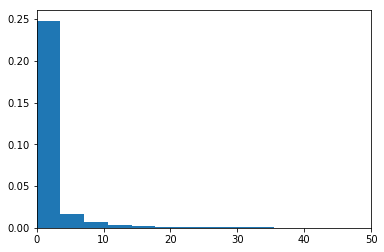

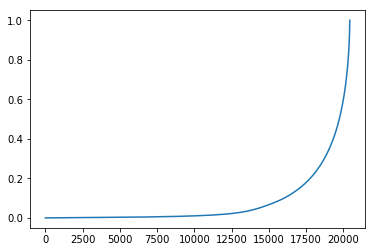

In [32]:
w = np.fromiter(dict(deg).values(), dtype = float)

# bins = np.linspace(0, w.max(), 50)

fig, ax = plt.subplots()
ax.hist(w, bins = 100, density  = 1)
ax.set_xlim(0, 50)
b = w.copy()
fig, ax = plt.subplots()
c =np.sort(b).cumsum() 
c /= c.max()
idx = np.argmin(abs(c - .5))
theta = np.sort(b)[idx]
ax.plot(c / c.max())
print(np.unique(w).shape, w.shape)

print(np.where(b > theta)[0].shape)

idx = []
for node in Gc:
    if Gc.degree(node, weight = 'weight') > theta:
        idx.append(node)
gg = Gc.subgraph(idx)

print('>', gg.number_of_nodes())

In [65]:
tmp = max(nx.connected_component_subgraphs(gg), key = len)
pos = nx.spring_layout(tmp, weight = 'weight')
# pos = nx.nx_agraph.graphviz_layout(tmp, prog='neato', args='')
# pos = nx.planar_layout(nx.planarity.PlanarEmbedding(tmp))

d   = np.array(list(dict(pos).values()))
a, b= d.max(0), d.min(0)
a *= 1
b *= 1




dd = np.array(list(dict(tmp.degree()).values()))
m, n = dd.min(), dd.max()

for i, j in tmp.edges():
    tmp[i][j]['edge_alpha'] = max((tmp[i][j]['weight'] - m) / (n - m), .05)
    tmp[i][j]['edge_color'] = 'red' if tmp[i][j]['weight'] < 0 else 'green'



In [76]:
from bokeh.models import MultiLine
from bokeh.palettes import Spectral4
from bokeh.models.graphs import from_networkx, NodesAndLinkedEdges, EdgesAndLinkedNodes
from bokeh.models import Plot, Range1d, MultiLine, Circle, HoverTool, TapTool, BoxSelectTool
p = figure(x_range = (b[0], a[0]), y_range = (b[1], a[1]))

p.add_tools(HoverTool(tooltips = None), TapTool(), BoxSelectTool())
graph = from_networkx(tmp, pos)

graph.node_renderer.glyph = Circle(size = 5, fill_color = Spectral4[0])
graph.node_renderer.selection_glyph = Circle(size=5, fill_color=Spectral4[2])
graph.node_renderer.hover_glyph = Circle(size=5, fill_color=Spectral4[1])
graph.edge_renderer.glyph = MultiLine(line_alpha = 'edge_alpha', line_color = 'edge_color')

graph.edge_renderer.selection_glyph = MultiLine(line_color=Spectral4[2], line_width=5)
graph.edge_renderer.hover_glyph = MultiLine(line_color=Spectral4[1], line_width=5)

graph.selection_policy = NodesAndLinkedEdges()
graph.inspection_policy = EdgesAndLinkedNodes()
p.renderers.append(graph)
show(p)